# Exploración preliminar y transformación de datos

In [67]:
# Bibliotecas requeridas
import sys
sys.path.append('../scr/')

import loadAndTransformData as ltd
import viewDataFunctions as vdf


import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
from matplotlib import pyplot as plt
import os


In [192]:
# Funciones a implmentar
def cats_y_nums(data):
    nums = data.select_dtypes(include=np.number).columns.tolist()
    cats = data.select_dtypes(include= 'object').columns.tolist()
    return cats,nums
def histog_mean_desv(data, n, dens=False):
    print('Histogramas de las variables numericas del dataset:')
    numericas = cats_y_nums(data)[1]
    data = data.loc[:, numericas]
    grilla = sns.FacetGrid(data.melt(), col='variable', col_wrap=n, sharex=False, sharey=False, height=5)
    grilla.map(sns.histplot, 'value', kde=dens)

    medias = data.mean()
    desviaciones = data.std()

    for ax, (variable, media, desviacion) in zip(grilla.axes.flat, zip(data.columns, medias, desviaciones)):
        ax.axvline(media, color='r', linestyle='--', label=f'Media: {media:.2f}')
        ax.axvline(media - desviacion, color='g', linestyle='--', label=f'Desv. Est.: {desviacion:.2f}')
        ax.axvline(media + desviacion, color='g', linestyle='--')
        ax.legend()

    plt.tight_layout()
    plt.show()
def cantidades_faltantes(data,t=None):
    print('Cantidades faltantes del dataset:')
    print(data.isnull().sum())
    print('% Faltantes del dataset:')
    print((data.isnull().sum()/data.shape[0])*100)
#     if t != None:
#         printtitulos('Mayores faltantes del dataset:')
#         print('Con threshold:',str(t))
#         perc = (data.isnull().sum()/data.shape[0])*100
#         print(perc[perc>=t])    
#         return list(perc[perc>=t].index)

def histog_categoricos(data,n,c=5,r=5):
    if type(data) == pd.core.series.Series:
        plt.figure(figsize=(c, r))
        valores, recuentos = data.value_counts().index, data.value_counts().values

        sns.barplot(x=valores, y=recuentos)
        plt.xlabel(data.name)
        plt.ylabel('Conteo')
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()
        
    else:
        num_columnas = n
        num_filas = r
        plt.figure(figsize=(c*num_columnas, r*num_filas))

        for i, columna in enumerate(data.columns):
            plt.subplot(num_filas, num_columnas, i+1)
         
            valores, recuentos = data[columna].value_counts().index, data[columna].value_counts().values
            sns.barplot(x=valores, y=recuentos)
            plt.xlabel(columna)
            plt.ylabel('Conteo')
            plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()
        
def box_grouped(data,var_analisis,cats,showfliers=False,c=3,cs=15,rs=5):
    
    if type(cats) == str:
        plt.figure(figsize=(cs, rs))
        
        sns.boxplot(data=data, x=cats, y= var_analisis, showfliers=showfliers)
        plt.title(f'{var_analisis} por {cats}')
        plt.xlabel(cats)
        plt.ylabel(var_analisis)
        plt.xticks(rotation=45)
        
    
    else:
        num_variables = len(cats)
        num_cols = c  # Define el número de columnas en la grilla
        num_rows = (num_variables + num_cols - 1) // num_cols  # Calcula el número de filas necesarias

        plt.figure(figsize=(cs, rs*num_rows))

        for i, variable in enumerate(cats, 1):

            plt.subplot(num_rows, num_cols, i)
            sns.boxplot(data=data, x=variable, y= var_analisis, showfliers=showfliers)

            plt.title(f'{var_analisis} por {variable}')
            plt.xlabel(variable)
            plt.ylabel(var_analisis)
            plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()
        
def uni_boxplot(data,var,showfliers=False,c=3,cs=15,rs=5):
    if isinstance(var, str):      
        plt.figure(figsize=(cs,rs))
        sns.boxplot(y=data[var])

        q1 = int(data[var].quantile(0.25))
        median = int(data[var].median())
        q3 = int(data[var].quantile(0.75))
        
        plt.text(0.5, q1, f'Q1: {q1:.2f}', verticalalignment='center', color='blue', fontsize=12)
        plt.text(0.5, median, f'Mediana: {median:.2f}', verticalalignment='center', color='green', fontsize=12)
        plt.text(0.5, q3, f'Q3: {q3:.2f}', verticalalignment='center', color='red', fontsize=12)
        
        plt.title(f'Boxplot {var}')
        plt.ylabel(f'{var}')

        plt.show()
                   
    else:
        num_variables = len(var)
        num_cols = c  # Define el número de columnas en la grilla
        num_rows = (num_variables + num_cols - 1) // num_cols  # Calcula el número de filas necesarias

        plt.figure(figsize=(cs, rs*num_rows))

        for i, variable in enumerate(var, 1):

            plt.subplot(num_rows, num_cols, i)
            sns.boxplot(y=data[variable], showfliers=showfliers)
            
            q1 = int(round(data[variable].quantile(0.25)))
            median = int(data[variable].median())
            q3 = int(data[variable].quantile(0.75))
            
            plt.text(0.5, q1, f'Q1: {q1}', verticalalignment='center', color='blue', fontsize=10)
            plt.text(0.5, median, f'Mediana: {median}', verticalalignment='center', color='green', fontsize=10)
            plt.text(0.5, q3, f'Q3: {q3}', verticalalignment='center', color='red', fontsize=10)

            plt.title(f'Boxplot {variable}')
            plt.ylabel(variable)

        plt.tight_layout()
        plt.show()

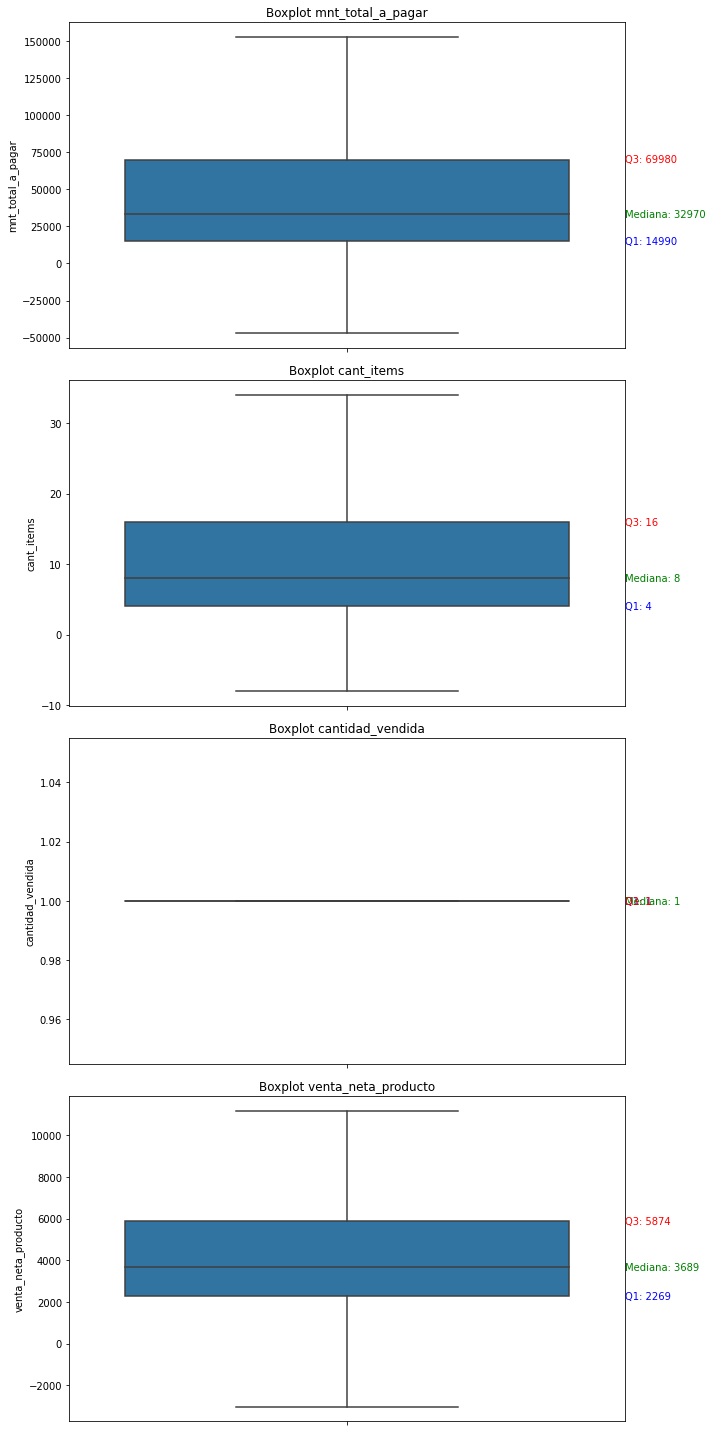

In [193]:
uni_boxplot(data,['mnt_total_a_pagar', 'cant_items', 'cantidad_vendida', 'venta_neta_producto'],c=1,cs=10,rs=5)

In [311]:
# Carga de datos
#data = ltd.cargar_csv('C:/Users/jpmog/Downloads/tu_(1)_2024_08_31.csv')
data = ltd.cargar_csv("C:/Users/Asus/Downloads/tu_(1)_2024_08_31.csv")

Archivo cargado correctamente.


In [5]:
#ltd.dividir_y_guardar_csv(data, 'fecha', 'mes', '../data/raw/', 'Minimarket_Sales_Data')

In [6]:
#model_data_producto = ltd.pivotear_df(data, 'codigo_factura', 'codigo_producto')
#model_data_familia = ltd.pivotear_df(data, 'codigo_factura', 'familia')
#model_data_categoria = ltd.pivotear_df(data, 'codigo_factura', 'categoria')
#model_data_subcategoria = ltd.pivotear_df(data, 'codigo_factura', 'subcategoria')

In [12]:
#print(model_data_producto.shape, model_data_familia.shape, model_data_categoria.shape, model_data_subcategoria.shape)

(39482, 1089) (39225, 12) (39482, 32) (39482, 186)


In [13]:
#ltd.guardar_csv(model_data_producto, '../data/processed/', 'Minimarket_Sales_Data_Transform_By_Product')
#ltd.guardar_csv(model_data_familia, '../data/processed/', 'Minimarket_Sales_Data_Transform_By_Family')
#ltd.guardar_csv(model_data_categoria, '../data/processed/', 'Minimarket_Sales_Data_Transform_By_Category')
#ltd.guardar_csv(model_data_subcategoria, '../data/processed/', 'Minimarket_Sales_Data_Transform_By_Subcategory')

Archivo guardado exitosamente en: ../data/processed/Minimarket_Sales_Data_Transform_By_Product.csv
Archivo guardado exitosamente en: ../data/processed/Minimarket_Sales_Data_Transform_By_Family.csv
Archivo guardado exitosamente en: ../data/processed/Minimarket_Sales_Data_Transform_By_Category.csv
Archivo guardado exitosamente en: ../data/processed/Minimarket_Sales_Data_Transform_By_Subcategory.csv


In [54]:
# Tipos de datos de las columnas 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152781 entries, 0 to 152780
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   fecha                 152781 non-null  object 
 1   codigo_factura        152781 non-null  int64  
 2   mnt_total_a_pagar     152781 non-null  float64
 3   cant_items            152781 non-null  int64  
 4   familia               152524 non-null  object 
 5   categoria             152781 non-null  object 
 6   subcategoria          152781 non-null  object 
 7   codigo_producto       152781 non-null  float64
 8   cantidad_vendida      152781 non-null  float64
 9   venta_bruta_producto  152781 non-null  float64
 10  venta_neta_producto   152781 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 12.8+ MB


In [317]:
data['codigo_factura'] = data['codigo_factura'].astype('category')
data['codigo_producto'] = data['codigo_producto'].astype('int').astype('category')
data['fecha'] = pd.to_datetime(data['fecha'])

In [313]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152781 entries, 0 to 152780
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   fecha                 152781 non-null  datetime64[ns]
 1   codigo_factura        152781 non-null  object        
 2   mnt_total_a_pagar     152781 non-null  float64       
 3   cant_items            152781 non-null  int64         
 4   familia               152524 non-null  object        
 5   categoria             152781 non-null  object        
 6   subcategoria          152781 non-null  object        
 7   codigo_producto       152781 non-null  object        
 8   cantidad_vendida      152781 non-null  float64       
 9   venta_bruta_producto  152781 non-null  float64       
 10  venta_neta_producto   152781 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 12.8+ MB


In [3]:
#Cantidad de columnas y registros del dataset
data.shape

(152781, 11)

In [57]:
# Vemos uan muestra de 5 registros de los datos
data.head(5)

,fecha,codigo_factura,mnt_total_a_pagar,cant_items,familia,categoria,subcategoria,codigo_producto,cantidad_vendida,venta_bruta_producto,venta_neta_producto
0,2024-03-01,2542191348,103760.0,21,Alimentos Sal,Galletería,Crackers,12000352,1.0,4490.0,3773.0
1,2024-03-01,2542191348,103760.0,21,Aseo,Aseo Hogar,Blanqueador,12000089,1.0,2800.0,2353.0
2,2024-03-01,2542191348,103760.0,21,Aseo,Aseo Hogar,Lavaplatos,12000231,3.0,8070.0,6782.0
3,2024-03-01,2542191348,103760.0,21,Aseo,Hogar,Tissue,12000175,1.0,2190.0,1840.0
4,2024-03-01,2542191348,103760.0,21,Aseo,Hogar,Cuidado Del Aire,12000570,1.0,5490.0,4613.0


In [62]:
# Se hace una descripción de los principales estadisticos del dataset
data.describe()

,mnt_total_a_pagar,cant_items,cantidad_vendida,venta_bruta_producto,venta_neta_producto
count,1.527810e+05,152781.000000,152781.000000,152781.000000,152781.000000
mean,5.452161e+04,12.118110,1.317513,5744.157781,5005.623468
std,6.688094e+04,13.672685,1.493976,5955.148598,5225.902761
min,-1.961100e+05,-35.000000,-18.000000,-139980.000000,-97025.000000
25%,1.499000e+04,4.000000,1.000000,2650.000000,2269.000000
50%,3.297000e+04,8.000000,1.000000,4290.000000,3689.000000
75%,6.998000e+04,16.000000,1.000000,6780.000000,5874.000000
max,1.186350e+06,212.000000,96.000000,349650.000000,293824.000000


In [65]:
# Cunatas variables numericas y categoricas hay y cuales son
print(f'Hay {len(cats_y_nums(data)[1])} variables numericas y {len(cats_y_nums(data)[0])} categoricas')
print(f'Numericas: {cats_y_nums(data)[1]}\nCategoricas:{cats_y_nums(data)[0]}')

Hay 5 variables numericas y 5 categoricas
Numericas: ['mnt_total_a_pagar', 'cant_items', 'cantidad_vendida', 'venta_bruta_producto', 'venta_neta_producto']
Categoricas:['codigo_factura', 'familia', 'categoria', 'subcategoria', 'codigo_producto']


Histogramas de las variables numericas del dataset:


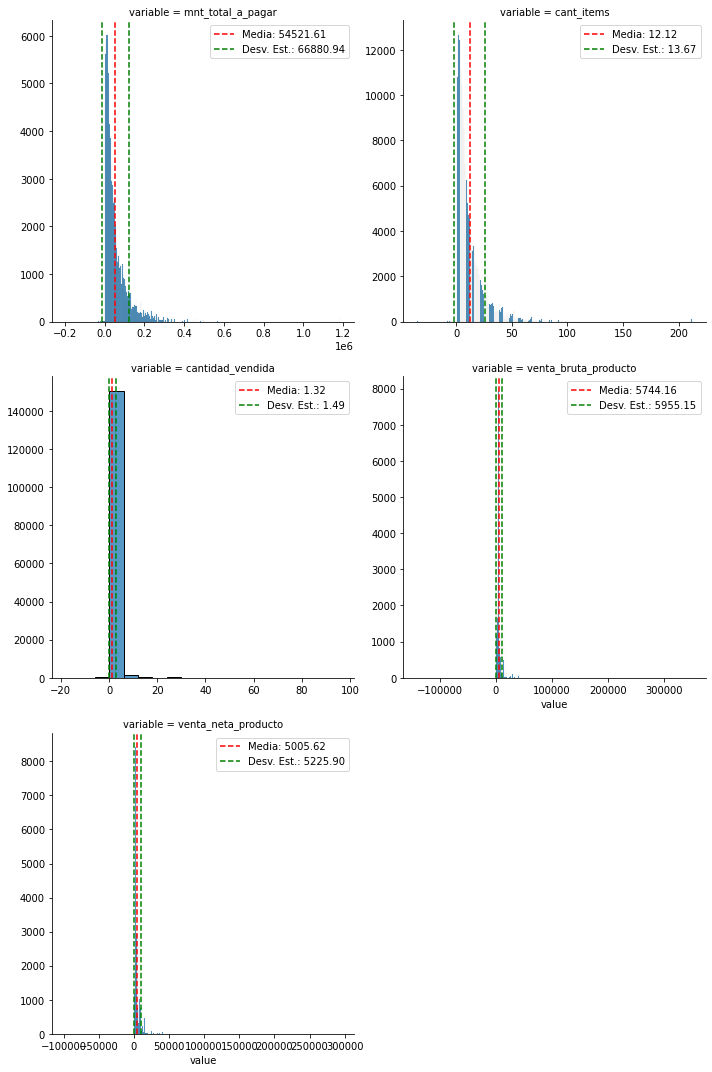

In [66]:
#Histogramas de las variables numericas
histog_mean_desv(data,2)

<Axes: >

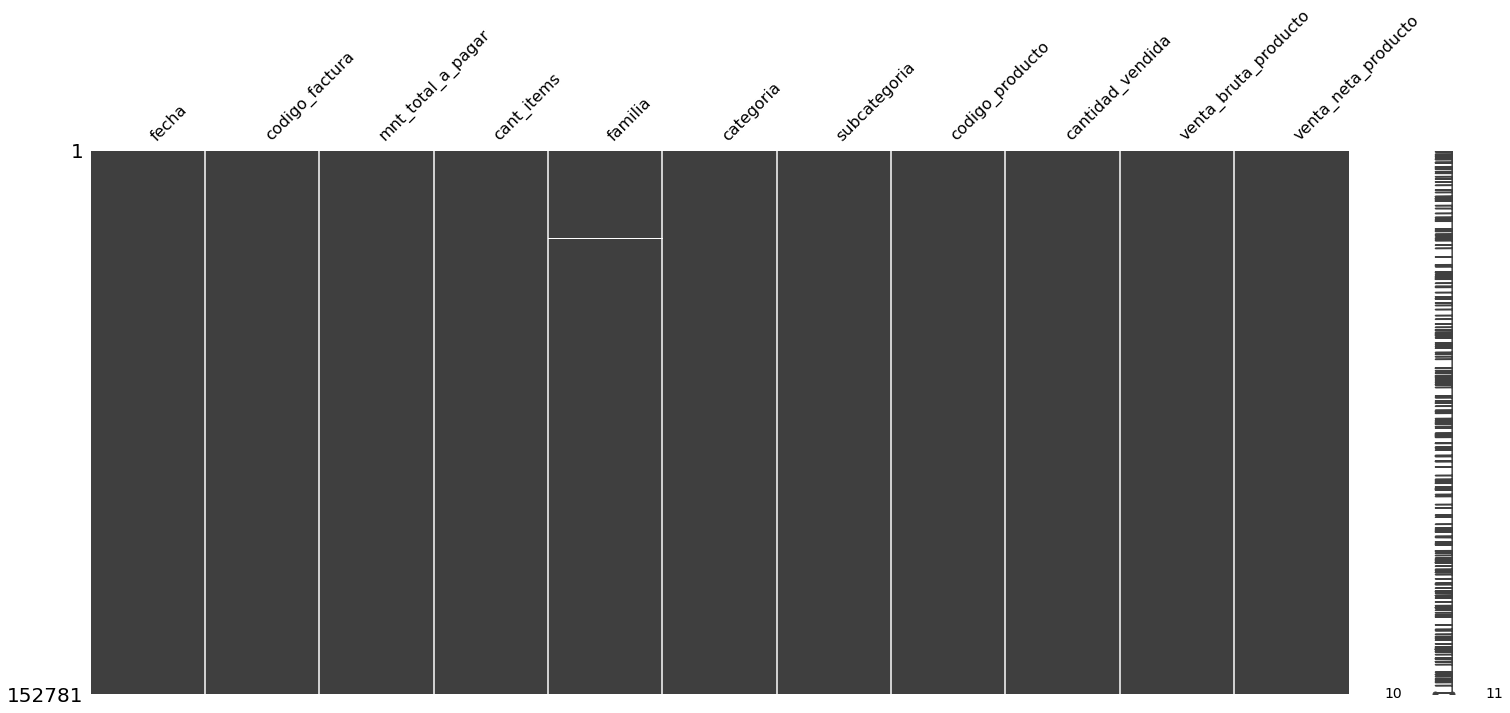

In [68]:
# Analisis Faltantes
msno.matrix(data)

<Axes: >

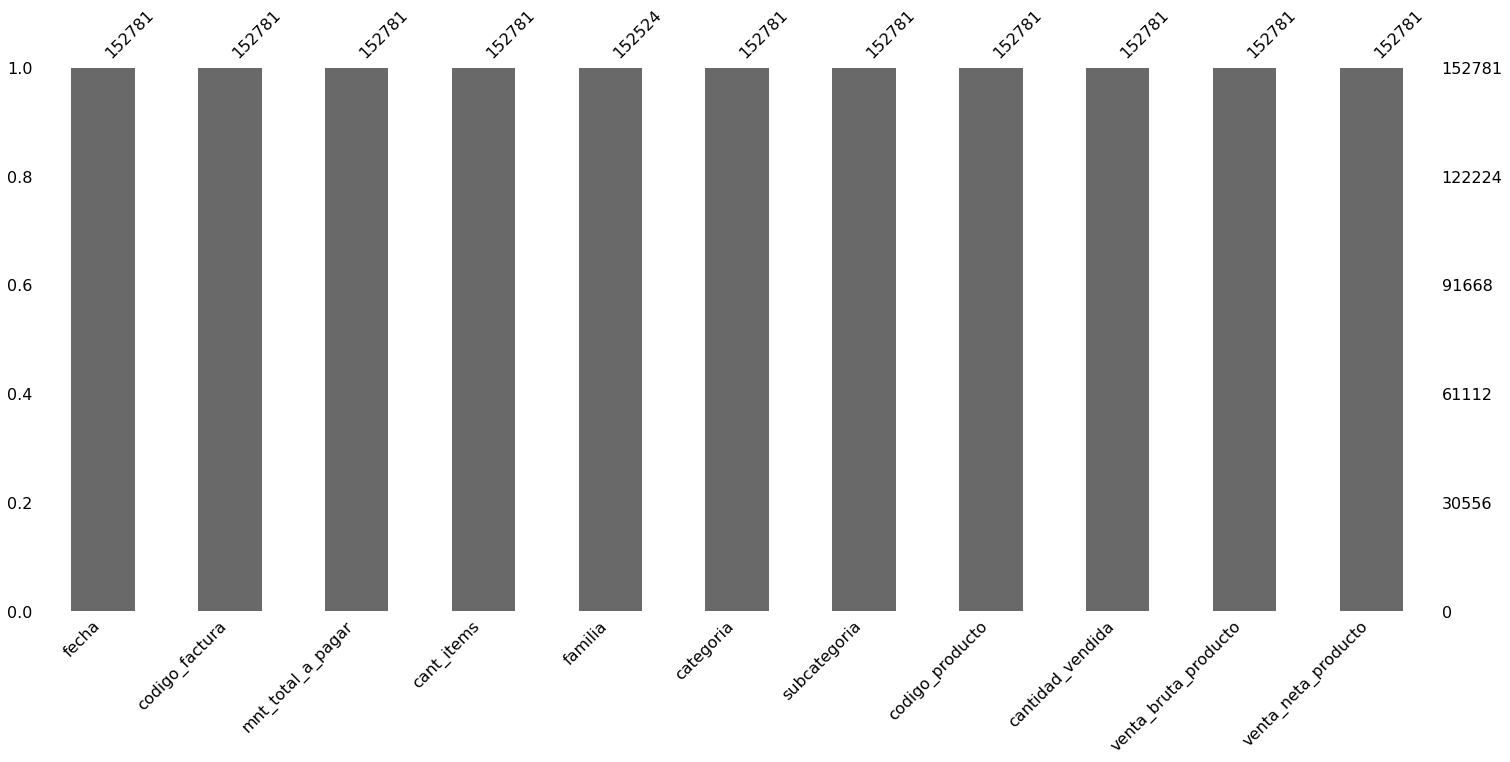

In [69]:
msno.bar(data)

In [73]:
cantidades_faltantes(data)

Cantidades faltantes del dataset:
fecha                     0
codigo_factura            0
mnt_total_a_pagar         0
cant_items                0
familia                 257
categoria                 0
subcategoria              0
codigo_producto           0
cantidad_vendida          0
venta_bruta_producto      0
venta_neta_producto       0
dtype: int64
% Faltantes del dataset:
fecha                   0.000000
codigo_factura          0.000000
mnt_total_a_pagar       0.000000
cant_items              0.000000
familia                 0.168215
categoria               0.000000
subcategoria            0.000000
codigo_producto         0.000000
cantidad_vendida        0.000000
venta_bruta_producto    0.000000
venta_neta_producto     0.000000
dtype: float64


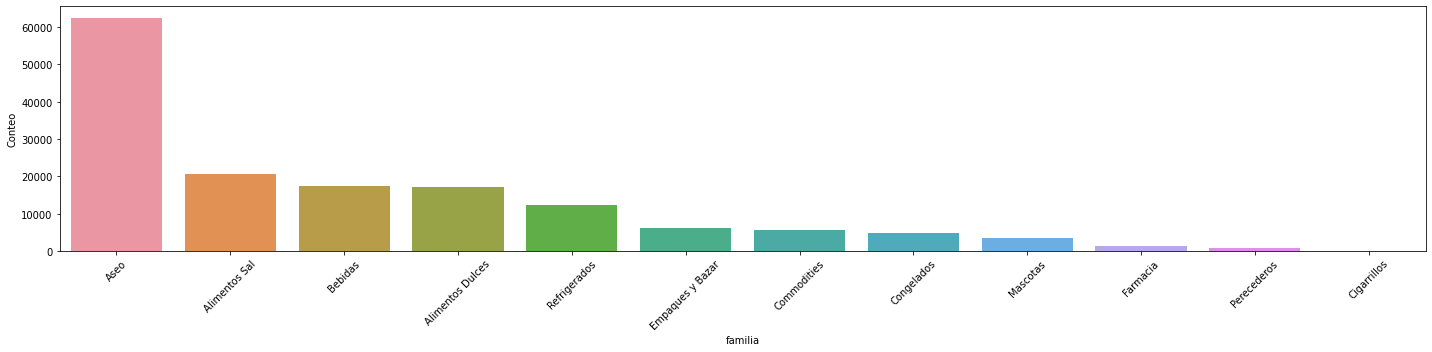

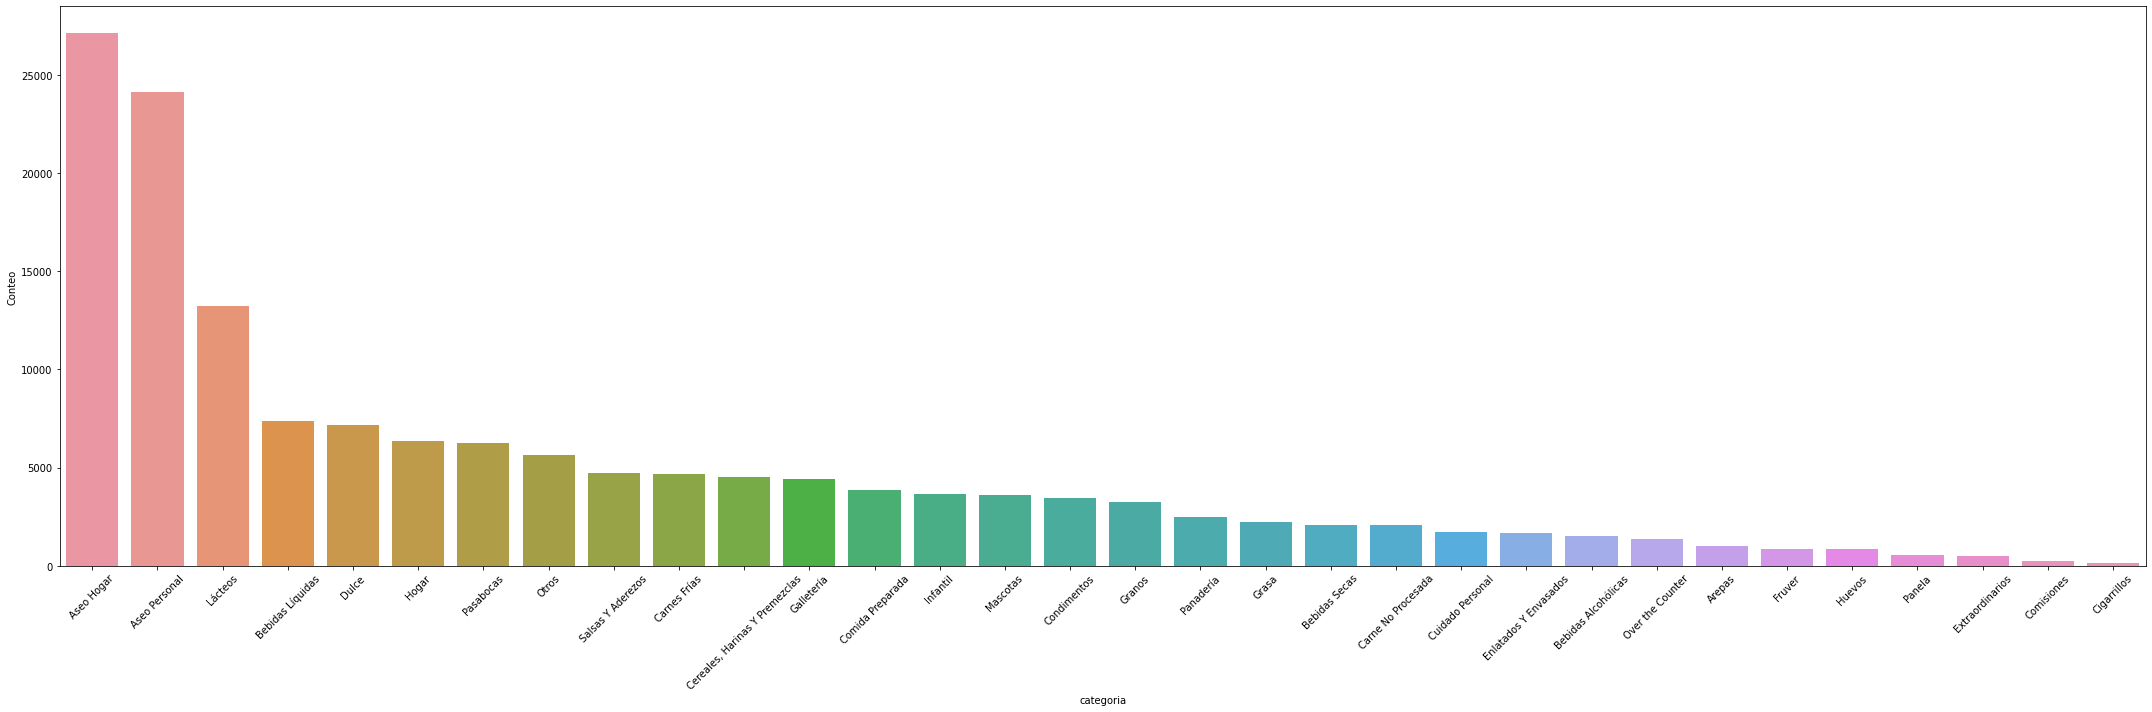

In [108]:
histog_categoricos(data['familia'],1,20,5)
histog_categoricos(data['categoria'],1,30,10)

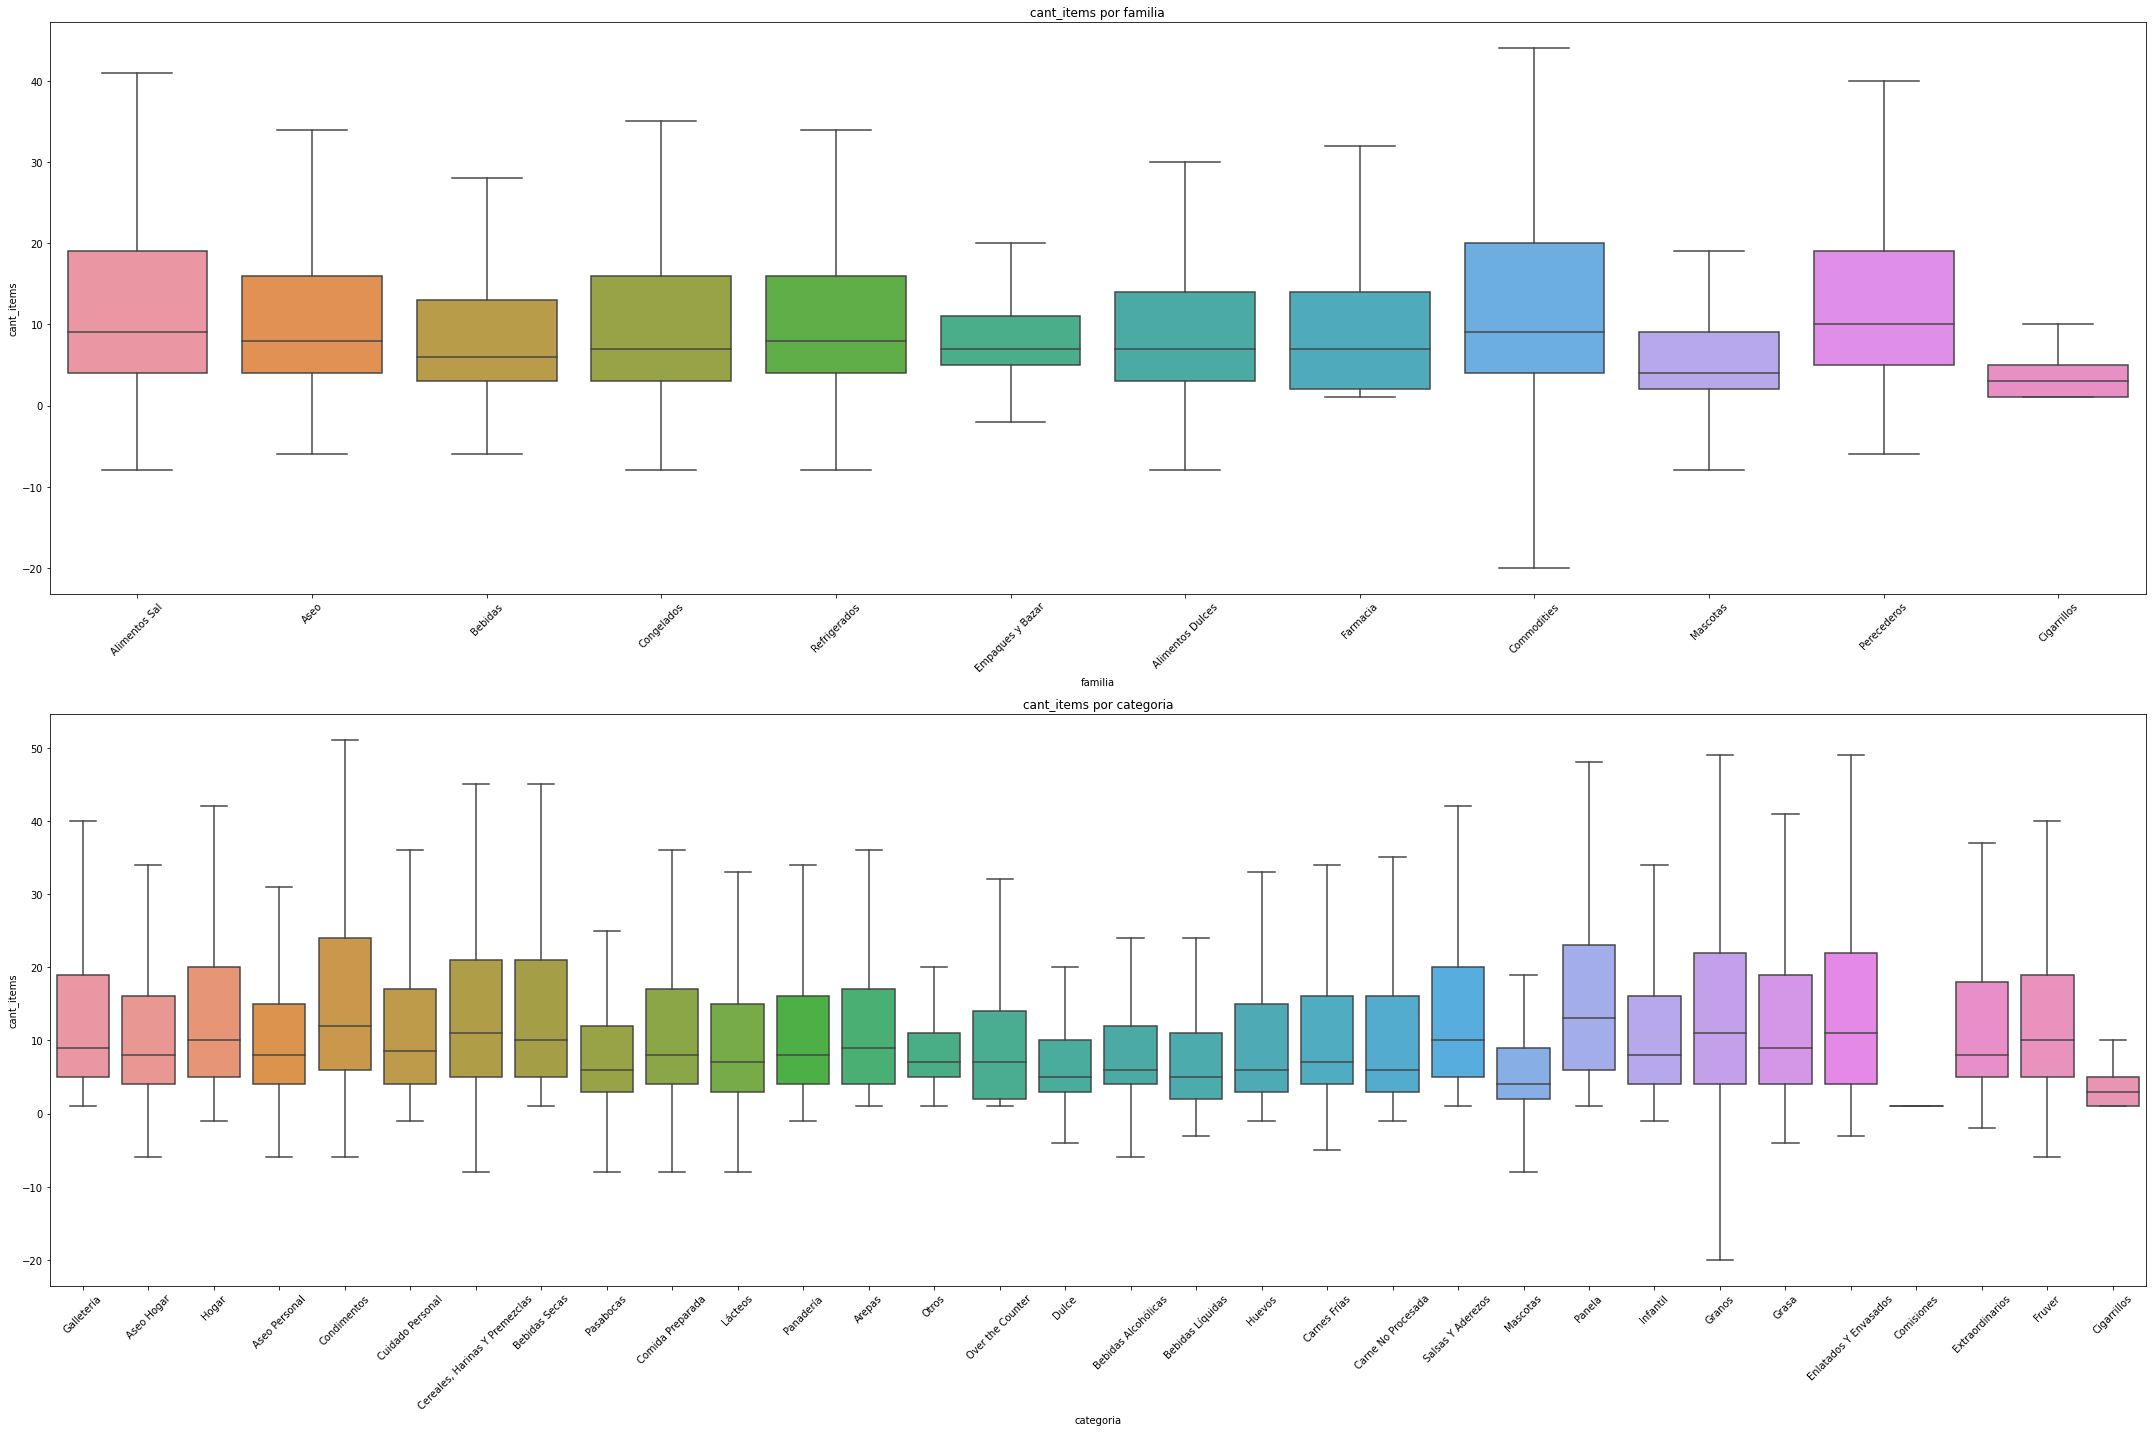

In [135]:
box_grouped(data,'cant_items',['familia','categoria'],c=1,cs=30,rs=10)

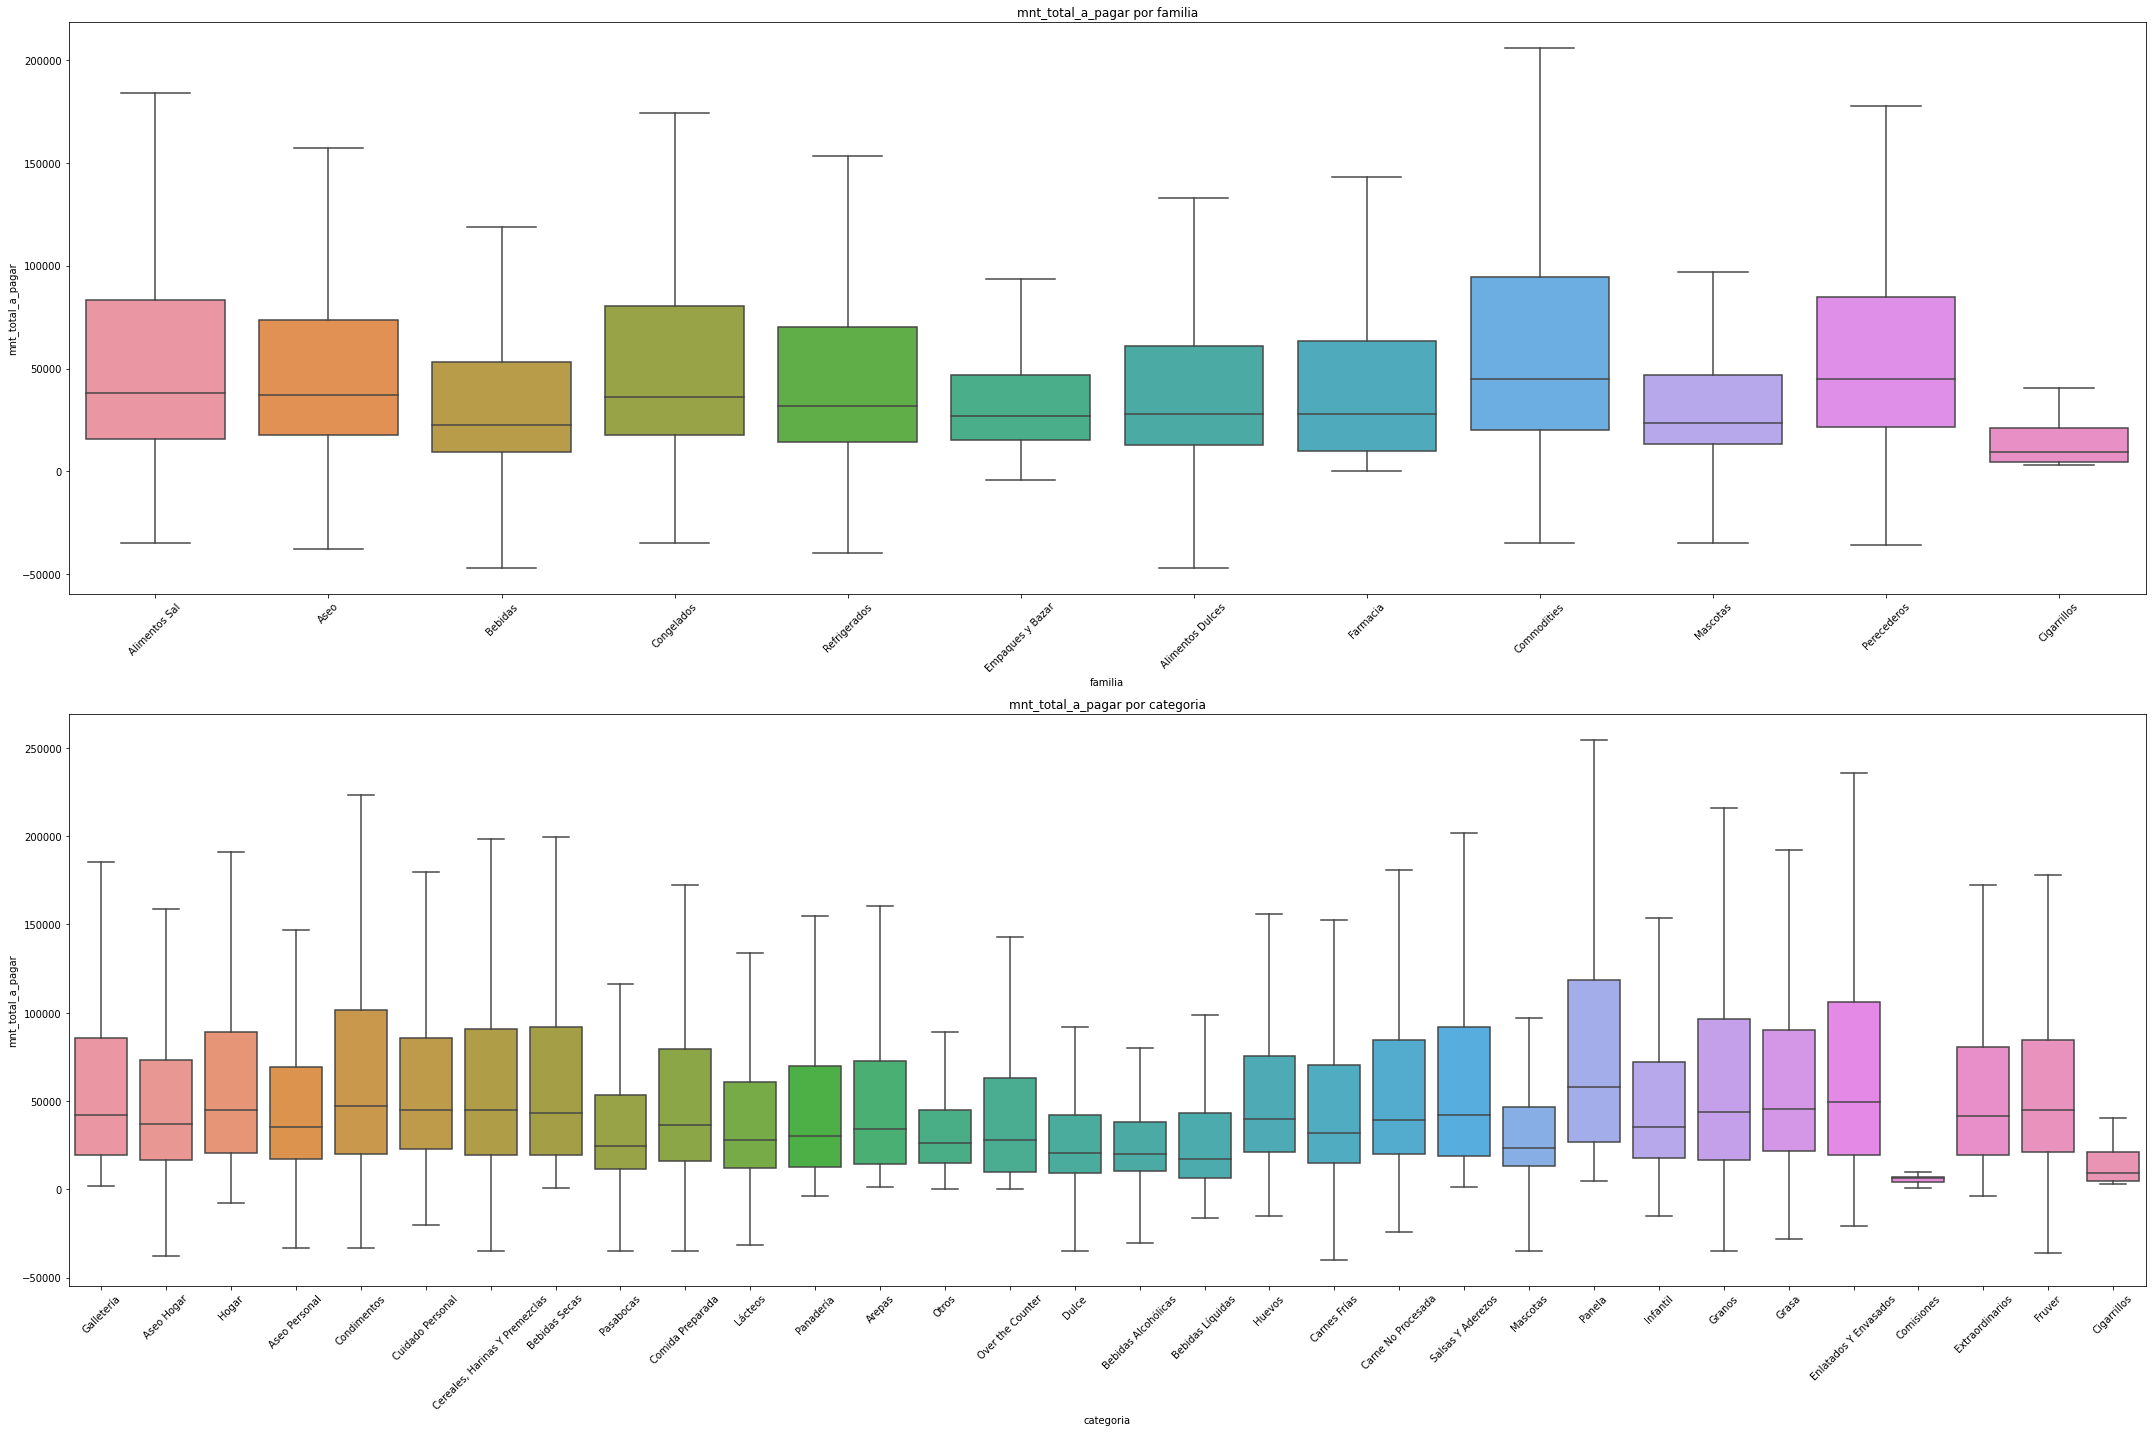

In [138]:
box_grouped(data,'mnt_total_a_pagar',['familia','categoria'],c=1,cs=30,rs=10)

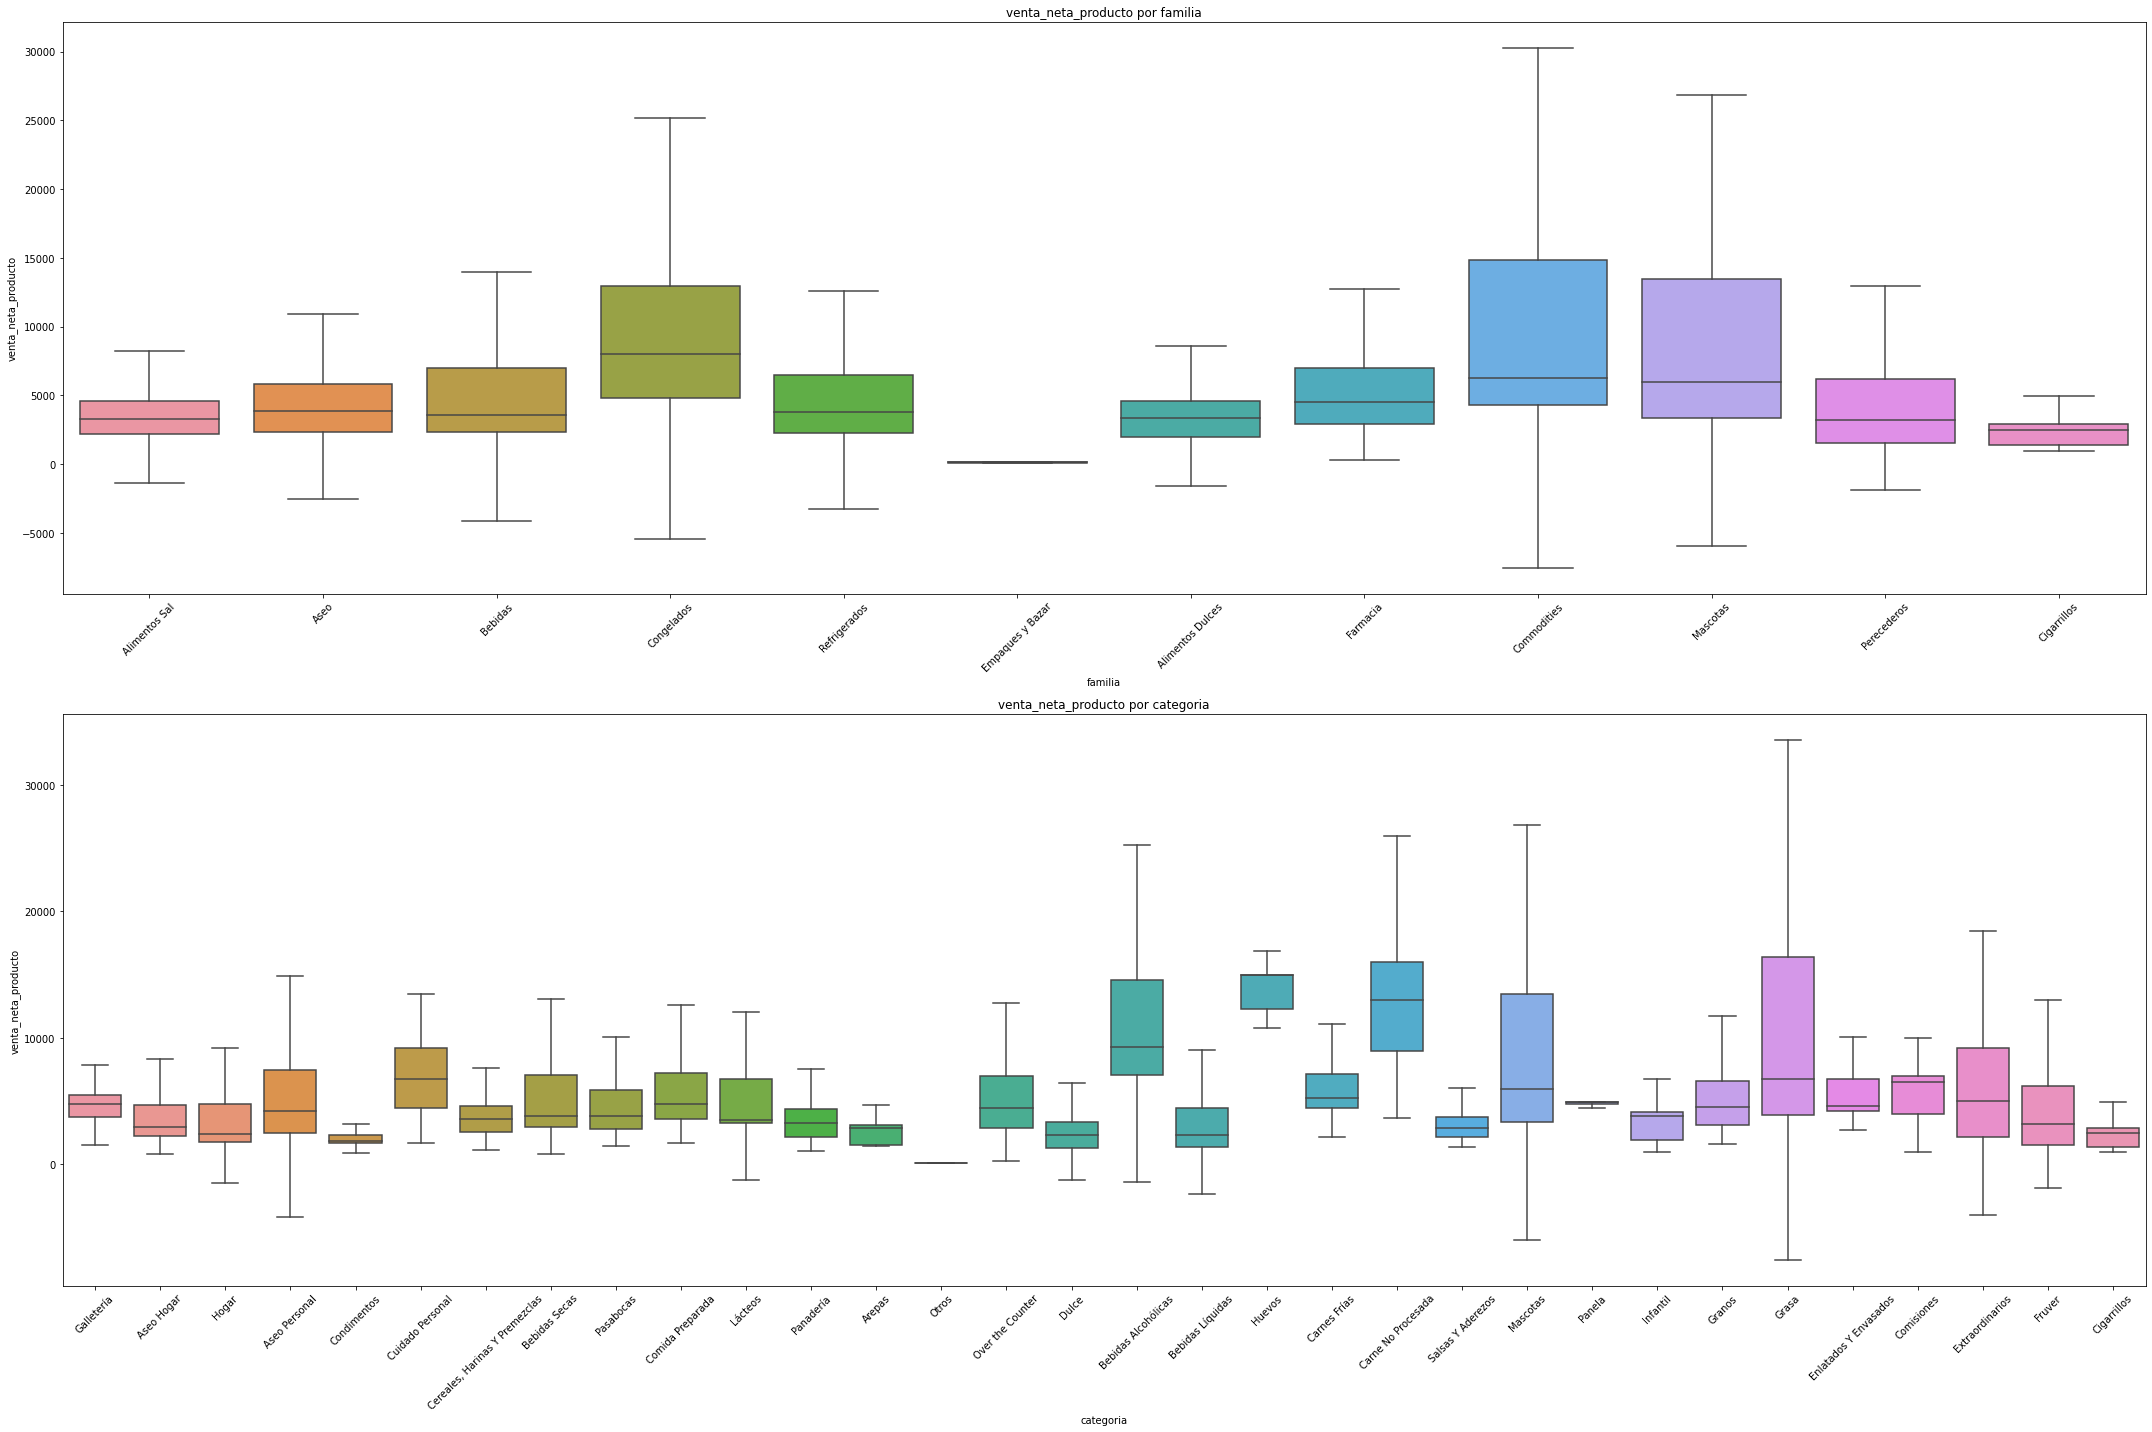

In [140]:
box_grouped(data,'venta_neta_producto',['familia','categoria'],c=1,cs=30,rs=10)

In [223]:
def contingencia(data,var,t=None):
    data_cross = data[['codigo_factura',var]]
    data_cross_unique = data_cross.drop_duplicates()
    cross_tab = pd.crosstab(index=data_cross_unique['codigo_factura'], columns=data_cross_unique[var])

    contingencia = cross_tab.T.dot(cross_tab)
    np.fill_diagonal(contingencia.values, 0)
    if t != None:
        return contingencia[contingencia > t].dropna(how='all').dropna(axis=1, how='all')
    #.fillna(0)
    else:
        return contingencia


In [224]:
contingencia(data,'familia',3000)

familia,Alimentos Dulces,Alimentos Sal,Aseo,Bebidas,Empaques y Bazar,Refrigerados
familia,,,,,,
Alimentos Dulces,NaN,4702.0,5711.0,4528.0,NaN,3496.0
Alimentos Sal,4702.0,NaN,5900.0,4842.0,NaN,3800.0
Aseo,5711.0,5900.0,NaN,5341.0,3988.0,4075.0
Bebidas,4528.0,4842.0,5341.0,NaN,NaN,3218.0
Empaques y Bazar,NaN,NaN,3988.0,NaN,NaN,NaN
Refrigerados,3496.0,3800.0,4075.0,3218.0,NaN,NaN


In [227]:
contingencia(data,'categoria',2000)

categoria,Aseo Hogar,Aseo Personal,Dulce,Hogar,Lácteos,Otros
categoria,,,,,,
Aseo Hogar,NaN,6612.0,NaN,2853.0,2912.0,2576.0
Aseo Personal,6612.0,NaN,2056.0,2976.0,3316.0,2768.0
Dulce,NaN,2056.0,NaN,NaN,NaN,NaN
Hogar,2853.0,2976.0,NaN,NaN,NaN,NaN
Lácteos,2912.0,3316.0,NaN,NaN,NaN,NaN
Otros,2576.0,2768.0,NaN,NaN,NaN,NaN


In [270]:
def linea(data,x,y,desfase1,desfase2):
    suma = data.groupby(x)[y].sum()
    plt.figure(figsize=(10, 6))
    plt.plot(suma.index, suma.values, marker='o')
    cambio_mes = suma.diff()
    
    for i, value in enumerate(suma.values):
        cambio = cambio_mes.iloc[i]
        plt.text(suma.index[i], value -desfase1, str(int(value)), ha='center')
        if pd.notna(cambio):
            plt.text(suma.index[i], value -desfase2, f'Δ {int(cambio)}', ha='center', color='blue')

    plt.title(f'{x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.ylim(0)
    plt.grid(True) 

    plt.show()

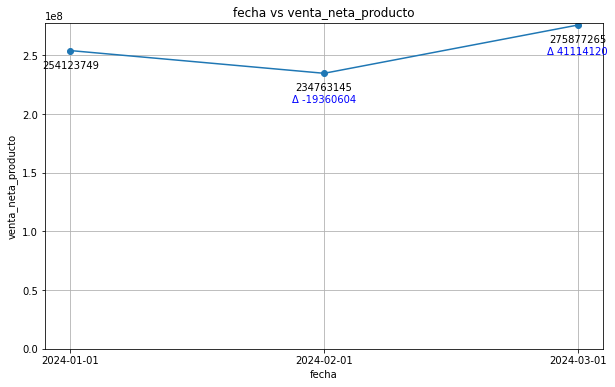

In [271]:
linea(data,'fecha','venta_neta_producto',15000000,25000000)

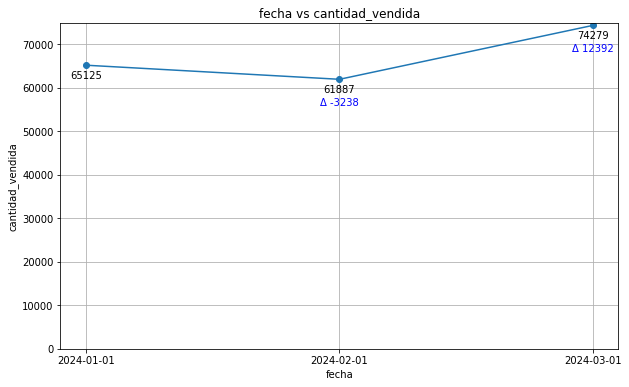

In [275]:
linea(data,'fecha','cantidad_vendida',3000,6000)

In [356]:
import pandas as pd
import string

def generar_etiquetas_consecutivas(n):
    """
    Genera etiquetas consecutivas en el formato A, B, ..., Z, A1, B1, ..., Z1, A2, B2, ..., etc.
    
    :param n: Número total de etiquetas a generar.
    :return: Lista de etiquetas.
    """
    etiquetas = []
    letras = list(string.ascii_uppercase)
    
    for i in range(n):
        if i < 26:
            etiquetas.append(letras[i])
        else:
            ciclo = i // 26
            indice = i % 26
            etiquetas.append(f"{letras[indice]}{ciclo}")
    
    return etiquetas


In [371]:
n_productos = data['codigo_producto'].nunique()

# Generar etiquetas
etiquetas = generar_etiquetas_consecutivas(n_productos)

# Crear un diccionario para mapear los productos originales a las nuevas etiquetas
mapa_productos = dict(zip(data['codigo_producto'].unique(), etiquetas))

# Renombrar los productos en la columna 'producto'
data['codigo_producto'] = data['codigo_producto'].map(mapa_productos)

In [372]:
data

,fecha,codigo_factura,mnt_total_a_pagar,cant_items,familia,categoria,subcategoria,codigo_producto,cantidad_vendida,venta_bruta_producto,venta_neta_producto
0,2024-03-01,2542191348,103760.0,21,Alimentos Sal,Galletería,Crackers,A,1.0,4490.0,3773.0
1,2024-03-01,2542191348,103760.0,21,Aseo,Aseo Hogar,Blanqueador,B,1.0,2800.0,2353.0
2,2024-03-01,2542191348,103760.0,21,Aseo,Aseo Hogar,Lavaplatos,C,3.0,8070.0,6782.0
3,2024-03-01,2542191348,103760.0,21,Aseo,Hogar,Tissue,D,1.0,2190.0,1840.0
4,2024-03-01,2542191348,103760.0,21,Aseo,Hogar,Cuidado Del Aire,E,1.0,5490.0,4613.0
...,...,...,...,...,...,...,...,...,...,...,...
152776,2024-03-01,2542191348,103760.0,21,Aseo,Hogar,Cuidado Del Aire,R20,1.0,5990.0,5034.0
152777,2024-03-01,2542191348,103760.0,21,Alimentos Sal,Enlatados Y Envasados,Mar,H8,2.0,9900.0,8319.0
152778,2024-03-01,2527515632,12970.0,3,Aseo,Aseo Personal,Femenina,I,1.0,8590.0,8590.0
152779,2024-03-01,2527515632,12970.0,3,Aseo,Aseo Personal,Femenina,L16,1.0,3290.0,3290.0


In [383]:
def pareto(data,cat,var,c=10,r=10,t=None,max_cat=None):
    
    suma = data.groupby(cat)[var].sum().reset_index()

    suma = suma.sort_values(by=var, ascending=False)

    suma['Porcentaje Acumulado'] = suma[var].cumsum() / suma[var].sum() * 100
    
    # Aplicar filtros basados en el threshold y el máximo de categorías
    if (t is not None) and (max_cat is not None):
        suma = suma[suma['Porcentaje Acumulado'] <= t].head(max_cat)
    elif t is not None:
        suma = suma[suma['Porcentaje Acumulado'] <= t]
    elif max_cat is not None:
        suma = suma.head(max_cat)
        
    fig, ax1 = plt.subplots(figsize=(c, r))
    
    #Barras
    ax1.bar(suma[cat], suma[var], color='blue')
    ax1.set_xlabel(cat)
    ax1.set_ylabel(var, color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    #porcentaje acumulado
    ax2 = ax1.twinx()
    ax2.plot(suma[cat], suma['Porcentaje Acumulado'], color='red', marker='o', linestyle='-')
    ax2.set_ylabel('Porcentaje Acumulado', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_ylim(0, 100)
    

    plt.title(f'Diagrama de Pareto - {var} por {cat}')
    
    for i in range(len(suma)):
        ax2.text(i, suma['Porcentaje Acumulado'].iloc[i], f"{int(suma['Porcentaje Acumulado'].iloc[i])}%", 
                 color='red', ha="center", fontsize=15)
        
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")

    plt.tight_layout()

    plt.show()
    print(f'Mostrando {len(suma)} Categorias')

<ipython-input-383-ffdfaab815a6>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")


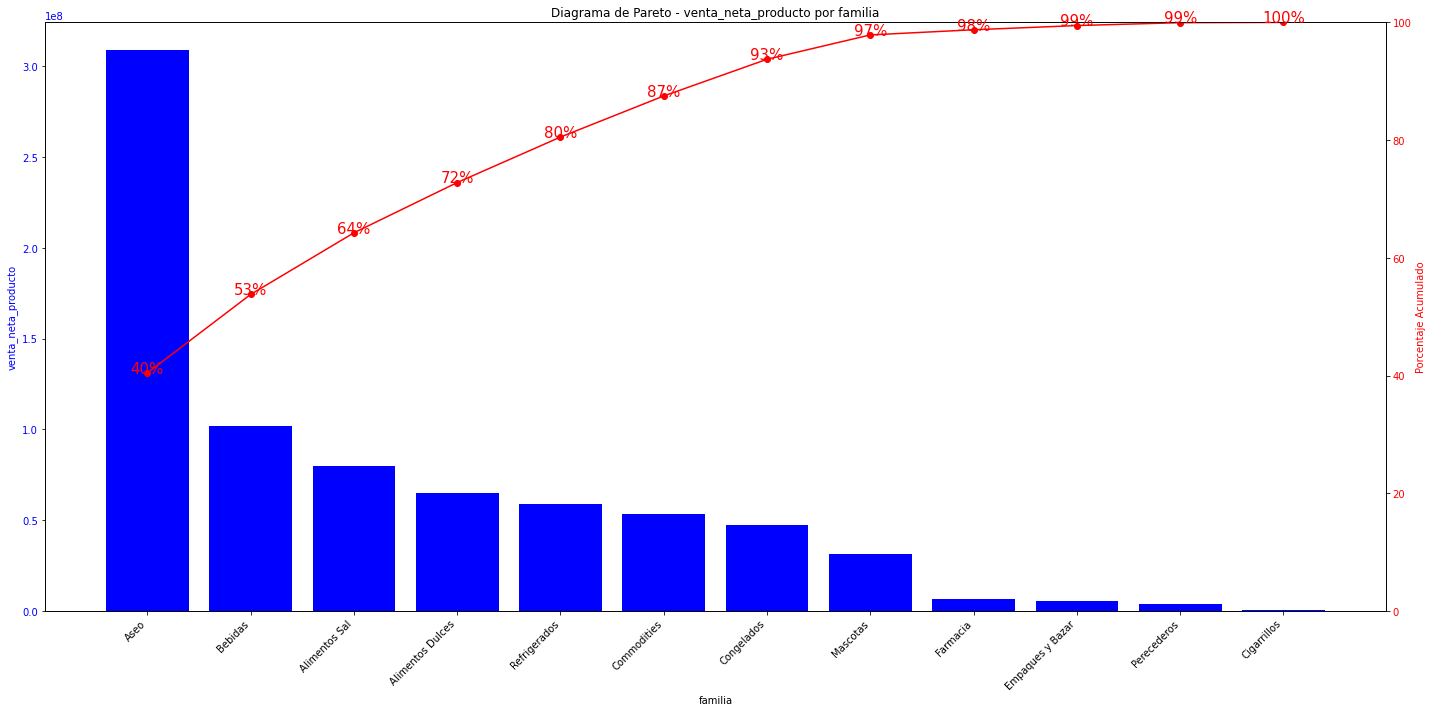

Mostrando 12 Categorias


In [384]:
pareto(data,'familia','venta_neta_producto',c=20)

<ipython-input-383-ffdfaab815a6>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")


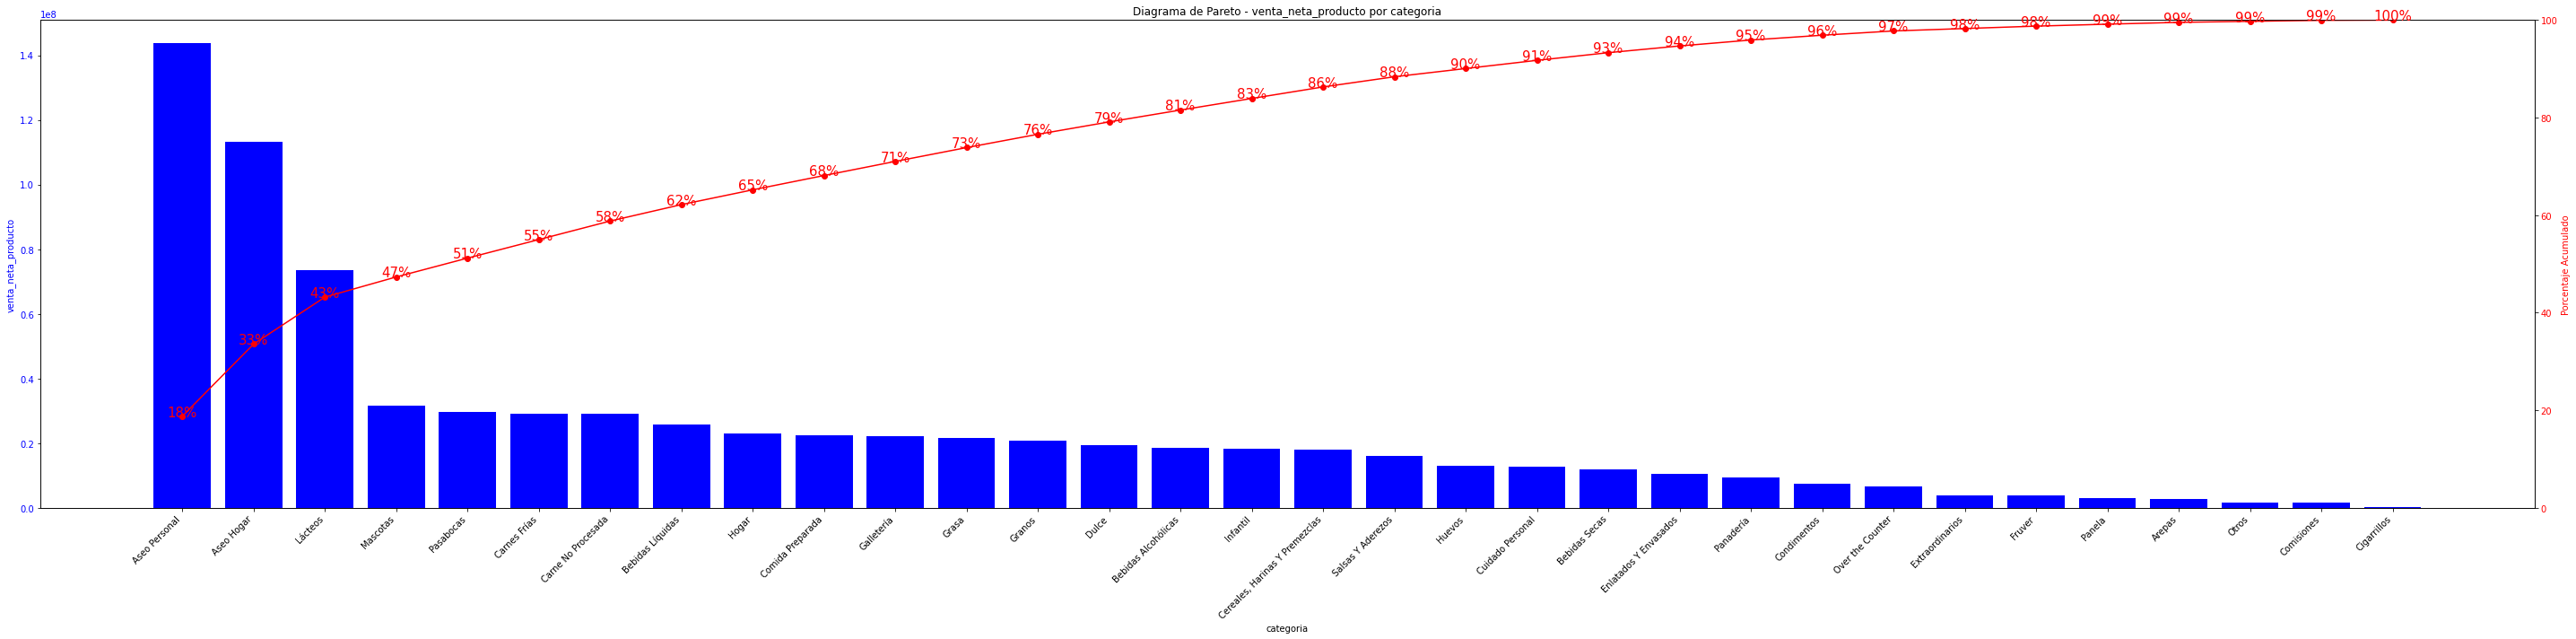

Mostrando 32 Categorias


In [385]:
pareto(data,'categoria','venta_neta_producto',c=40)

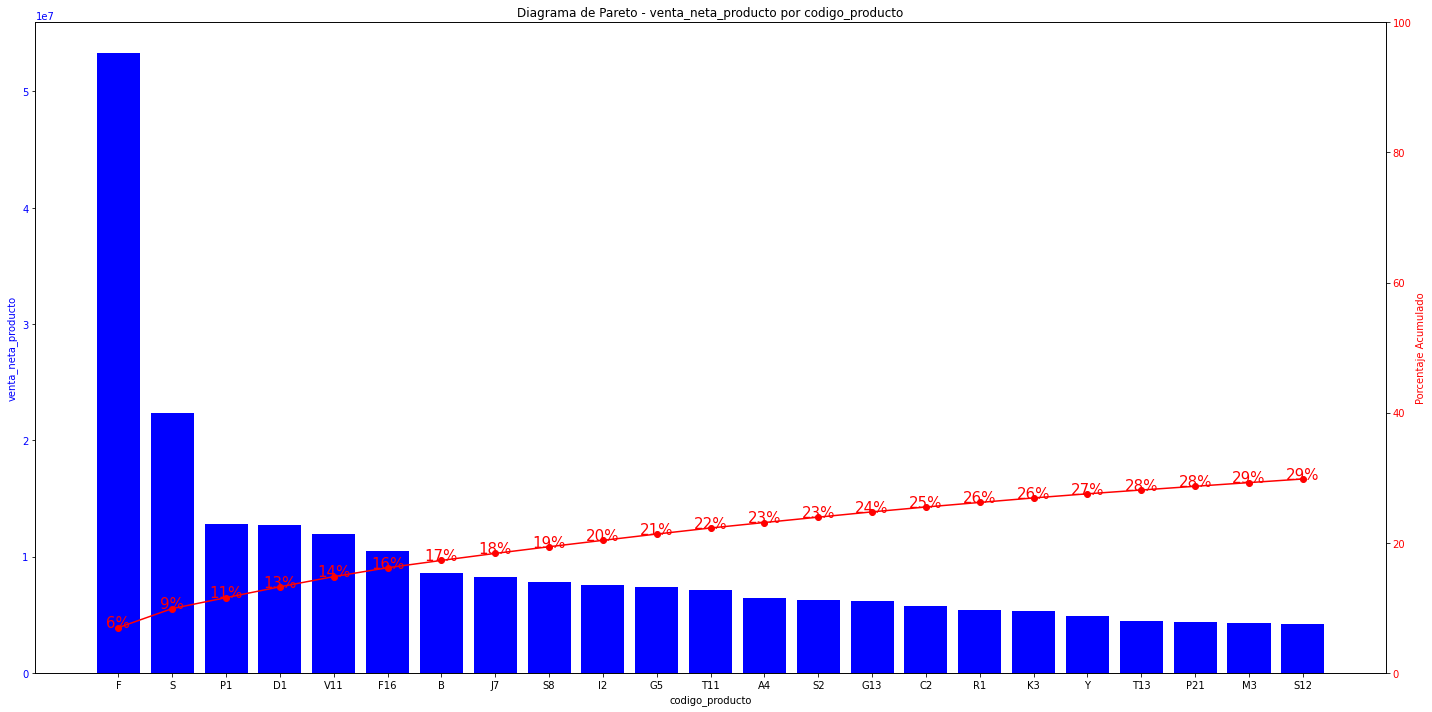

Mostrando 23 Categorias


In [370]:
pareto(data,'codigo_producto','venta_neta_producto',c=20,t=30)

<ipython-input-383-ffdfaab815a6>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")


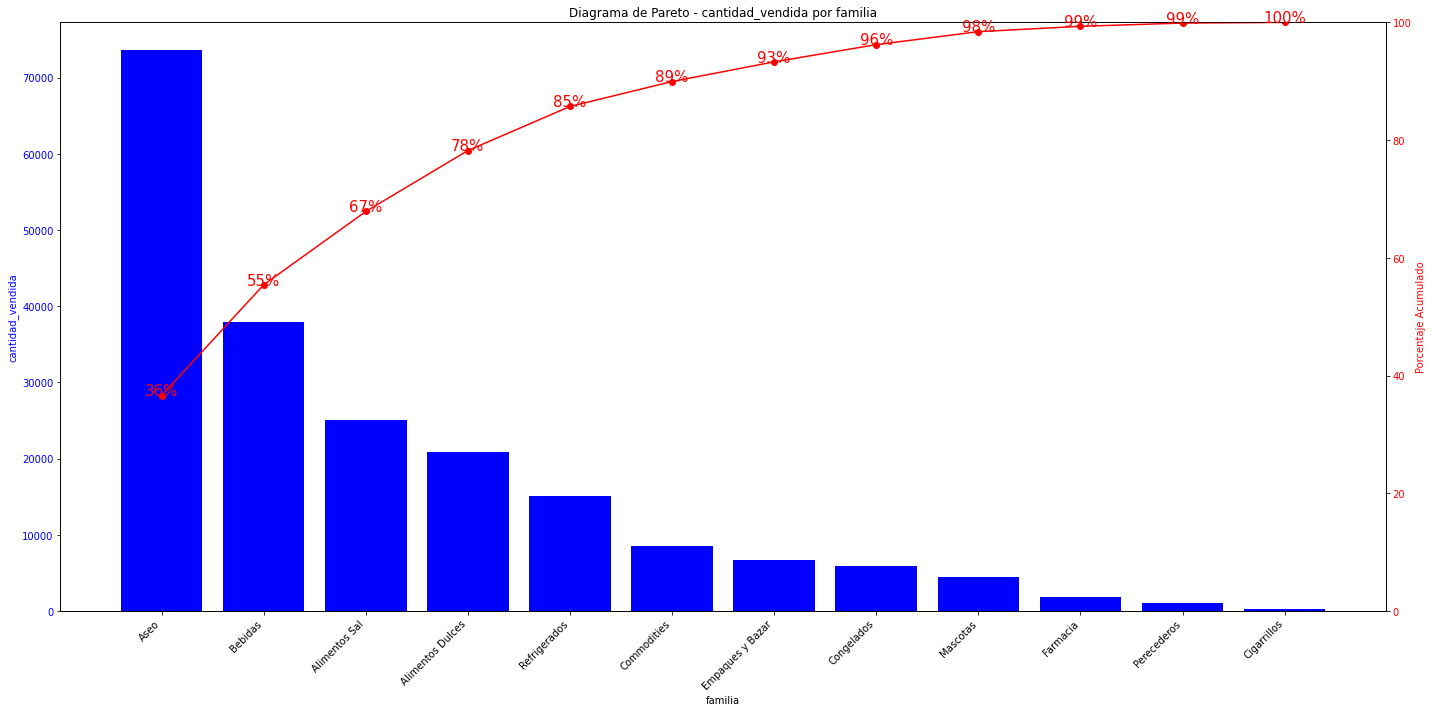

Mostrando 12 Categorias


In [386]:
pareto(data,'familia','cantidad_vendida',c=20)

<ipython-input-383-ffdfaab815a6>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")


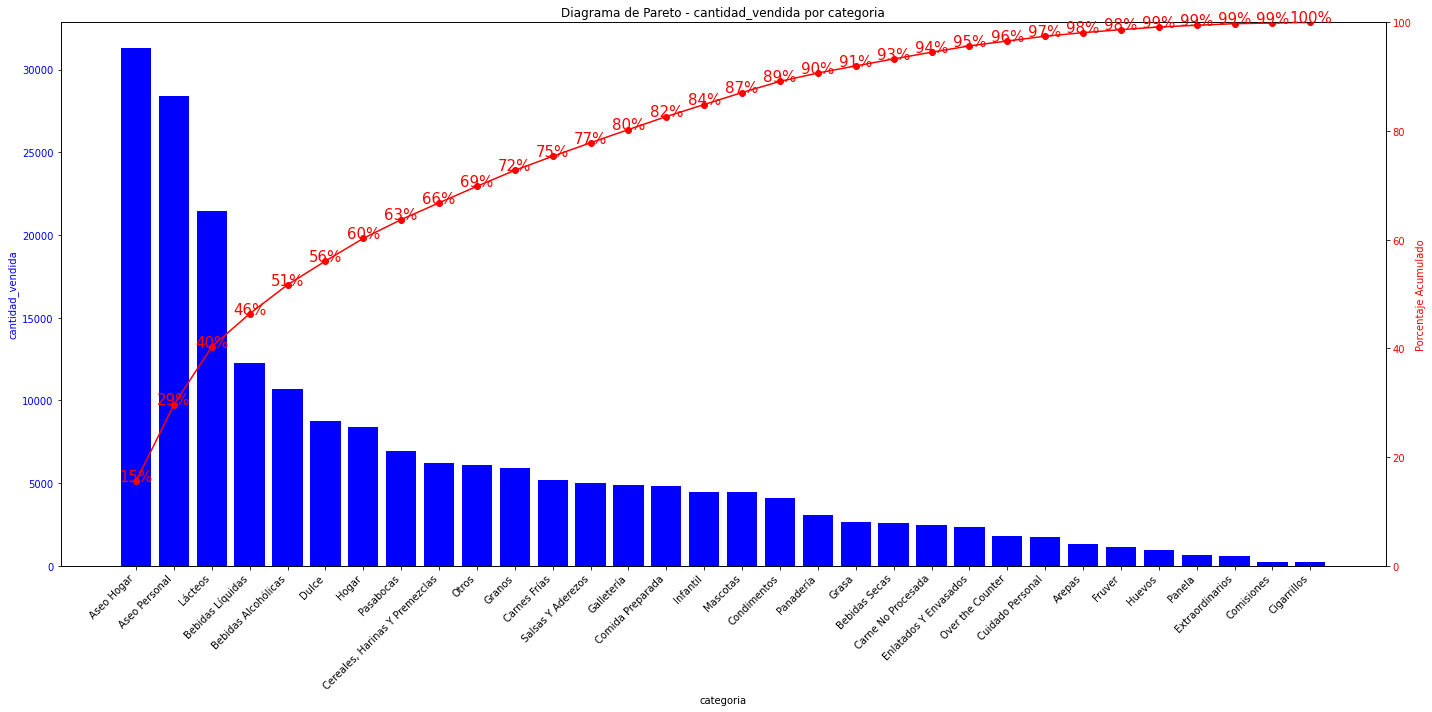

Mostrando 32 Categorias


In [387]:
pareto(data,'categoria','cantidad_vendida',c=20)

<ipython-input-383-ffdfaab815a6>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")


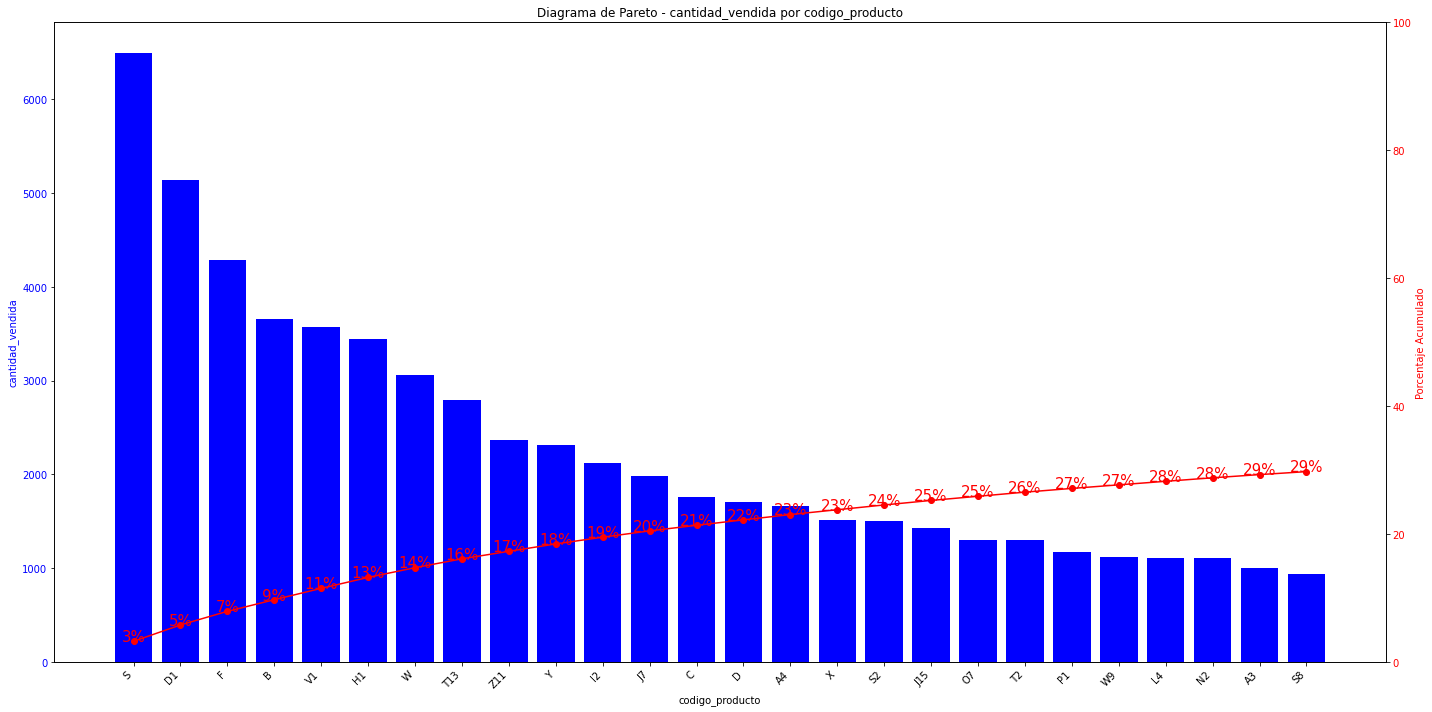

Mostrando 26 Categorias


In [388]:
pareto(data,'codigo_producto','cantidad_vendida',c=20,t=30)

In [400]:
def outliers(data,var):
    #Rango Intercuartil
    unicos = data.drop_duplicates(subset=var).set_index('codigo_factura')
    columna = unicos[var]
    Q1 = columna.quantile(0.25)
    Q3 = columna.quantile(0.75)
    IQR = Q3 - Q1
    
    #Cota inferior y superior
    lb = Q1 - 1.5 * IQR
    ub = Q3 + 1.5 * IQR
    
    out = unicos[(columna < lb) | (columna > ub)]
    
    return out[[var]]
    

In [401]:
# Outliers variable: mnt_total_a_pagar
outliers(data,'mnt_total_a_pagar')

,mnt_total_a_pagar
codigo_factura,
2476499042,241650.0
2496919460,154700.0
2462288138,298350.0
2542921639,150520.0
2501777587,162720.0
...,...
2506979081,151800.0
2510783636,-139980.0
2459996823,287300.0


Histogramas de las variables numericas del dataset:


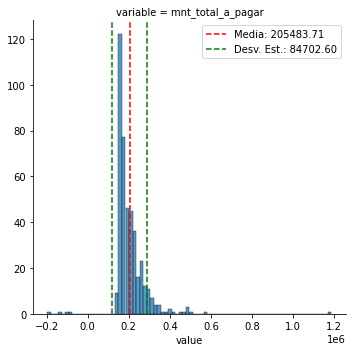

In [406]:
histog_mean_desv(outliers(data,'mnt_total_a_pagar'),1)

In [408]:
# Outliers variable: cantidad_items
# Outliers variable: mnt_total_a_pagar
outliers(data,'cant_items')

,cant_items
codigo_factura,
2346743027,212
